# Nearest Neighbour classification and regression
### Exercises #1
### CCE2502

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
import csv
%matplotlib inline

## Exercise I
1. Load data
3. Code 1-NN algorithm
4. Test algorithm
5. Create mesh to visualise decision boundary
6. Color code points as classified by algorithm

In [98]:
with open('Table5-2_atheleteA.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [99]:
data

[['ID\t  ', '  Speed  ', '  Agility  ', '  Draft'],
 ['1  ', '  2.50  ', '  6.00  ', '  no'],
 ['2  ', '  3.75  ', '  8.00  ', '  no'],
 ['3  ', '  2.25  ', '  5.50  ', '  no'],
 ['4  ', '  3.25  ', '  8.25  ', '  no'],
 ['5  ', '  2.75  ', '  7.50  ', '  no'],
 ['6  ', '  4.50  ', '  5.00  ', '  no'],
 ['7  ', '  3.50  ', '  5.25  ', '  no'],
 ['8  ', '  3.00  ', '  3.25  ', '  no'],
 ['9  ', '  4.00  ', '  4.00  ', '  no'],
 ['10  ', '  4.25  ', '  3.75  ', '  no'],
 ['11  ', '  2.00  ', '  2.00  ', '  no'],
 ['12  ', '  5.00  ', '  2.50  ', '  no'],
 ['13  ', '  8.25  ', '  8.50  ', '  no'],
 ['14  ', '  5.75  ', '  8.75  ', '  yes'],
 ['15  ', '  4.75  ', '  6.25  ', '  yes'],
 ['16  ', '  5.50  ', '  6.75  ', '  yes'],
 ['17  ', '  5.25  ', '  9.50  ', '  yes'],
 ['18  ', '  7.00  ', '  4.25  ', '  yes'],
 ['19  ', '  7.50  ', '  8.00  ', '  yes'],
 ['20  ', '  7.25  ', '  5.75  ', '  yes']]

In [100]:
# Explore data and convert to numpy arrays (X, y)
m = len(data)-1
print('Number of examples = ', m)
D = np.zeros((m,3),dtype=float)
str2float={'no':0.0, 'yes':1.0}
for i, item in enumerate(data[1:]):
    D[i,0:2] = (float(item[1].strip()), float(item[2].strip()))
    D[i,2] = str2float[item[3].strip()] 

Number of examples =  20


In [101]:
D

array([[2.5 , 6.  , 0.  ],
       [3.75, 8.  , 0.  ],
       [2.25, 5.5 , 0.  ],
       [3.25, 8.25, 0.  ],
       [2.75, 7.5 , 0.  ],
       [4.5 , 5.  , 0.  ],
       [3.5 , 5.25, 0.  ],
       [3.  , 3.25, 0.  ],
       [4.  , 4.  , 0.  ],
       [4.25, 3.75, 0.  ],
       [2.  , 2.  , 0.  ],
       [5.  , 2.5 , 0.  ],
       [8.25, 8.5 , 0.  ],
       [5.75, 8.75, 1.  ],
       [4.75, 6.25, 1.  ],
       [5.5 , 6.75, 1.  ],
       [5.25, 9.5 , 1.  ],
       [7.  , 4.25, 1.  ],
       [7.5 , 8.  , 1.  ],
       [7.25, 5.75, 1.  ]])

In [102]:
# Alternatively you can do it the numpy way
D = np.array(data[1:])
D = np.delete(D,0,1)
D[:,2] = np.where(D[:,2] == '  no', 0, D[:,2])
D[:,2] = np.where(D[:,2] == '  yes', 1, D[:,2])
D = D.astype(float)
D

array([[2.5 , 6.  , 0.  ],
       [3.75, 8.  , 0.  ],
       [2.25, 5.5 , 0.  ],
       [3.25, 8.25, 0.  ],
       [2.75, 7.5 , 0.  ],
       [4.5 , 5.  , 0.  ],
       [3.5 , 5.25, 0.  ],
       [3.  , 3.25, 0.  ],
       [4.  , 4.  , 0.  ],
       [4.25, 3.75, 0.  ],
       [2.  , 2.  , 0.  ],
       [5.  , 2.5 , 0.  ],
       [8.25, 8.5 , 0.  ],
       [5.75, 8.75, 1.  ],
       [4.75, 6.25, 1.  ],
       [5.5 , 6.75, 1.  ],
       [5.25, 9.5 , 1.  ],
       [7.  , 4.25, 1.  ],
       [7.5 , 8.  , 1.  ],
       [7.25, 5.75, 1.  ]])

In [103]:
# Display first few rows in dataset
D[0:4]

array([[2.5 , 6.  , 0.  ],
       [3.75, 8.  , 0.  ],
       [2.25, 5.5 , 0.  ],
       [3.25, 8.25, 0.  ]])

In [104]:
# our 1-NN model
def nearest_neighbour_euclidian(X_train, y_train, x_new):
    """
    X_train : feature array in n-dimensions, m rows (examples)
    y_train : output labels in any dimension, typically 1-dimension,  of size m
    x_new : query example in n-dimensions (one example only)
    Returns the predicted class and minimum distance
    """
    dist = ((X_train-x_new)**2).sum(axis=1)
    idx = np.where(dist == dist.min())
    return y_train[idx[0][0]], dist.min()

print(nearest_neighbour_euclidian.__doc__)


    X_train : feature array in n-dimensions, m rows (examples)
    y_train : output labels in any dimension, typically 1-dimension,  of size m
    x_new : query example in n-dimensions (one example only)
    Returns the predicted class and minimum distance
    


In [105]:
# testing the algorithm
# pass on the same dataset example and test for label and distance == 0
#
features = D[:,0:2]
labels = D[:,2]
predicted = np.empty((labels.shape[0],2))
for row in range(D.shape[0]):
    query = D[row,0:2]
    #predicted = nearest_neighbour_euclidian(D[:,0:2],D[:,2], D[row,0:2])
    predicted[row] = nearest_neighbour_euclidian(features, labels, query)
#
assert np.all(predicted[:,0] == labels), "output labels not consistent with dataset"
assert np.all(predicted[:,1] == 0.0), "distance metric not all zero"

Text(0, 0.5, 'Agility')

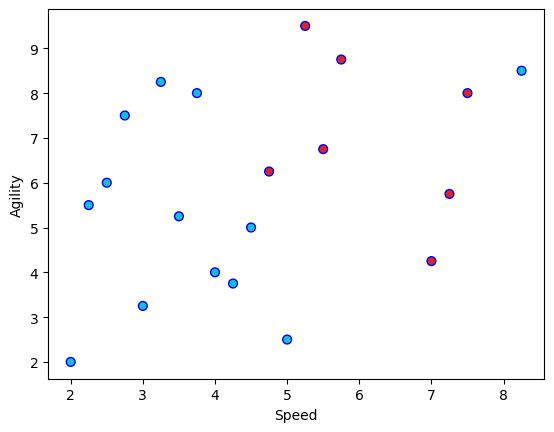

In [106]:
cmap_DB = ListedColormap(['#2ca02c', '#ff7f0e'])  # green, orange
cmap_DS = ListedColormap(['#17becf', '#d62728'])   # cyan, red

plt.scatter(D[:, 0], D[:, 1], c=D[:,2], cmap=cmap_DS,
                edgecolor='b', s=40)
plt.xlabel('Speed')
plt.ylabel('Agility')

In [107]:
# we will create a mesh and fill the Z values with the 1-NN predictions
def display_decision_boundary(k=1):
    r = 0.05
    X = D[:,0:2]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
    Z = np.empty((xx.shape[0],xx.shape[1]))
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            #Z[i,j] = nearest_neighbour_euclidian(X, D[:,2],[xx[i,j],yy[i,j]])[0]
            Z[i,j] = k_nearest_neighbour_euclidian(k, X, D[:,2],[xx[i,j],yy[i,j]])

    cmap_DB = ListedColormap(['#2ca02c', '#ff7f0e'])  # green, orange
    cmap_DS = ListedColormap(['#17becf', '#d62728'])   # cyan, red

    # Plot a pcolormesh plot (decision boundary)
    plt.figure(figsize=(5,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_DB)

    # Plot the dataset
    plt.scatter(X[:, 0], X[:, 1], c=D[:,2], cmap=cmap_DS, edgecolor='b', s=200)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


In [108]:
# our 1-NN model
def k_nearest_neighbour_euclidian(k, X_train, y_train, x_new):
    """
    k : hyper-parameter in k-NN model
    X_train : feature array in n-dimensions
    y_train : output labels in any dimension, typically 1-dimension
    x_new : query example in n-dimensions
    Returns the predicted class 
    """
    m = y_train.shape[0]
    dist = ((X_train-x_new)**2).sum(axis=1)
    DD = np.concatenate((X_train, y_train.reshape((m,1)), 
                         dist.reshape((m,1))), axis=1)
    DDs = DD[np.argsort(DD[:,3])]
    r = DDs[0:k,2].sum()
    c = 1 if r > k/2. else 0
    #return DDs[0:k,:], r, c 
    return c 

print(nearest_neighbour_euclidian.__doc__)


    X_train : feature array in n-dimensions, m rows (examples)
    y_train : output labels in any dimension, typically 1-dimension,  of size m
    x_new : query example in n-dimensions (one example only)
    Returns the predicted class and minimum distance
    


In [109]:
k_nearest_neighbour_euclidian(3, D[:,0:2], D[:,2],[5.5, 5.4])

1

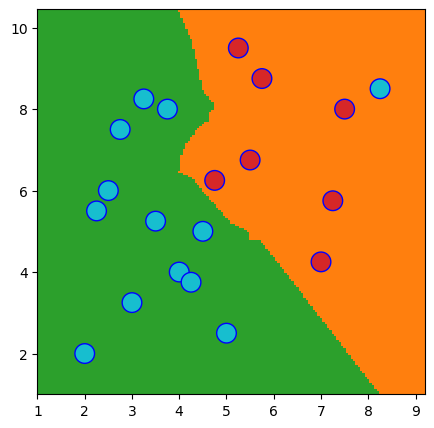

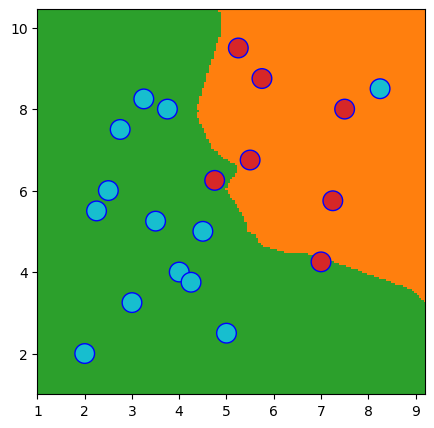

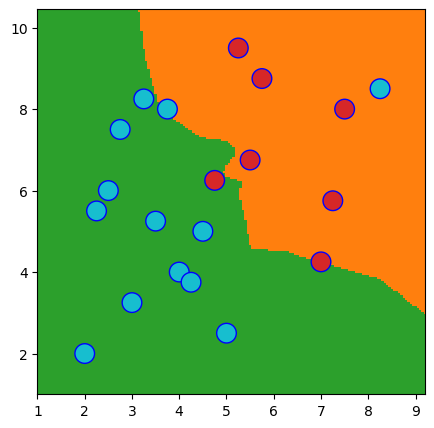

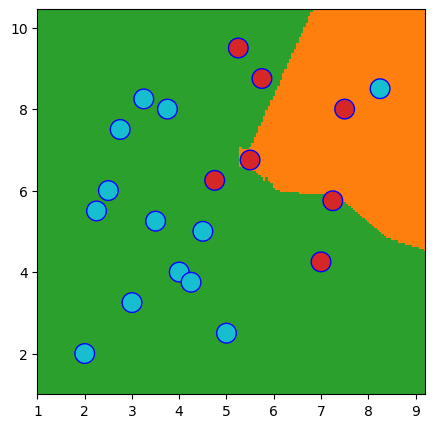

In [110]:
display_decision_boundary(k=3)
display_decision_boundary(k=5)
display_decision_boundary(k=7)
display_decision_boundary(k=13)

## Exercise II
1. Computing accuracy
2. Jack-knifing, leave one out (k-fold)
3. Shuffle and Split data in train and test
4. Compute variance

In [111]:
# write a function that calls k-NN model multiple times
def predict_kNN(k, X_train, y_train, X_query):
    """
    k : HP of k-NN
    X_query is a mxn dimensional real array
    m: number of query examples
    n: number of features
    return : predictions for each example in X_query, m-dimensional
    """
    m = X_query.shape[0]
    y = np.zeros(m)
    for i in range(m):
        y[i] = k_nearest_neighbour_euclidian(k, X_train, y_train, 
                                             X_query[i])
    return y

In [112]:
predict_kNN(3, D[:,0:2], D[:,2],np.array([[5.5, 5.4], 
                                          [2.5, 7.4],
                                          [6.5, 6.0]]))

array([1., 0., 1.])

In [113]:
y_pred = predict_kNN(1, D[:,0:2], D[:,2], D[:,0:2])
(y_pred == D[:,2]).astype(float).sum()/D.shape[0]

1.0

In [114]:
np.random.shuffle(D)
s = 16
D_train = np.copy(D[0:s,:])
D_test = np.copy(D[s:,:])

In [115]:
y_pred = predict_kNN(3, D_train[:,0:2], D_train[:,2], D_test[:,0:2])
(y_pred == D_test[:,2]).astype(float).sum()/D_test.shape[0]

1.0

In [116]:
# jack knifing (leave one out)
m = D.shape[0]
Y_pred = -np.ones(m)
for i in range(20):
    t = list(range(m))
    t.remove(i)
    X_train, y_train = D[t, 0:2], D[t, 2]
    X_test, y_test = D[i, 0:2], D[i, 2]
    y_pred = k_nearest_neighbour_euclidian(1, X_train, y_train, X_test)
    Y_pred[i] = y_pred == y_test

Y_pred

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1.])

In [117]:
Y_pred

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1.])

In [118]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((19, 2), (19,), (2,), ())

## Exercise III
1. Predicting continuous output variable
2. load data
3. normalise
4. predict using k=3
5. compute error (mse)

In [119]:
with open('Table5-8_whiskey.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [120]:
# Explore data and convert to numpy arrays (X, y)
m = len(data)-1
print('Number of examples = ', m)
D = np.array(data[1:],dtype=float)
D = D[:,1:]

Number of examples =  20


In [121]:
col = {'age':0, 'rating':1, 'price':2}

In [122]:
D[:, col['price']]

array([ 30.,  40.,  55., 550.,  35.,  45.,  70.,  85.,  78.,  75., 500.,
       200.,  65., 120.,  12., 250.,  18., 450.,  10.,  30.])

In [123]:
X_train, y_train = D[:, 0:2], D[:, 2]
X_test, y_test = D[0, 0:2], D[0, 2]

In [124]:
def k_nearest_neighbour_regression(k, X_train, y_train, x_new):
    """
    k : hyper-parameter in k-NN model
    X_train : feature array in n-dimensions
    y_train : output labels in any dimension, typically 1-dimension
    x_new : query example in n-dimensions
    Returns the predicted class 
    """
    m = y_train.shape[0]
    dist = ((X_train-x_new)**2).sum(axis=1)
    DD = np.concatenate((X_train, y_train.reshape((m,1)), 
                         dist.reshape((m,1))), axis=1)
    DDs = DD[np.argsort(DD[:,3])]
    r = DDs[0:k,2].mean()
    return r 

In [125]:
k_nearest_neighbour_regression(3, X_train, y_train, X_test)

23.333333333333332

In [126]:
def get_mean_square_error(y_predicted, y_actual):
    return ((y_predicted-y_actual)**2.0).mean()

In [127]:
for k in [1,2,3,4,5,6,7,8,9,10]:
    # jack knifing (leave one out)
    m = D.shape[0]
    Y_pred = -np.ones(m, dtype=float)
    for i in range(20):
        t = list(range(m))
        t.remove(i)
        X_train, y_train = D[t, 0:2], D[t, 2]
        X_test, y_test = D[i, 0:2], D[i, 2]
        y_pred = k_nearest_neighbour_regression(k, X_train, 
                                                y_train, 
                                                X_test)
        Y_pred[i] = (y_pred - y_test)**2.0

    print(k, ':', Y_pred.mean())

1 : 36637.15
2 : 17454.1125
3 : 16372.122222222224
4 : 17964.015625
5 : 19631.798
6 : 22836.280555555557
7 : 23997.680612244898
8 : 24107.9640625
9 : 24613.625308641975
10 : 25652.768
